<a href="https://colab.research.google.com/github/nandalasumana/INFO5307/blob/main/credit_card_customers_ipynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INFO5307
## CASE STUDY - 3



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization


## TASKS
* Predict the customers who will churn based on the dataset containing customers who churned and did not churn.



In [2]:
# Encoding
from sklearn import preprocessing

# Splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Pipelines
from sklearn.pipeline import Pipeline

# Metrics and cross validation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc

# Stratified K-Fold
from sklearn.model_selection import StratifiedKFold

# I. DATA CLEANING

## Loading data

In [4]:
df = pd.read_csv('Credit card dataset.csv')

In [5]:
# Dropping the last two rows as said in the instructions
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis = 1, inplace = True)

In [6]:
# Checking if data was loaded properly
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [7]:
df.tail(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [8]:
# Summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# Summary statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [11]:
# Summary statistics for categorical features
df.describe(include = 'object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


## Checking for missing values

In [12]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Checking for duplicates

In [13]:
df.duplicated().value_counts()

False    10127
dtype: int64

**There are no missing and duplicate values found in the dataset.**

## Checking for misspelled values in columns with categorical features

In [14]:
df_cat = df.select_dtypes('object').columns
for col in df_cat:
    print(df[col].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


**There are no misspelled values in the categorical features, but there is the presence of _Unknown_ entries for some features.**


## Checking for  column data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**All columns seem to have the proper data type.**

## Checking for outliers

ValueError: ignored

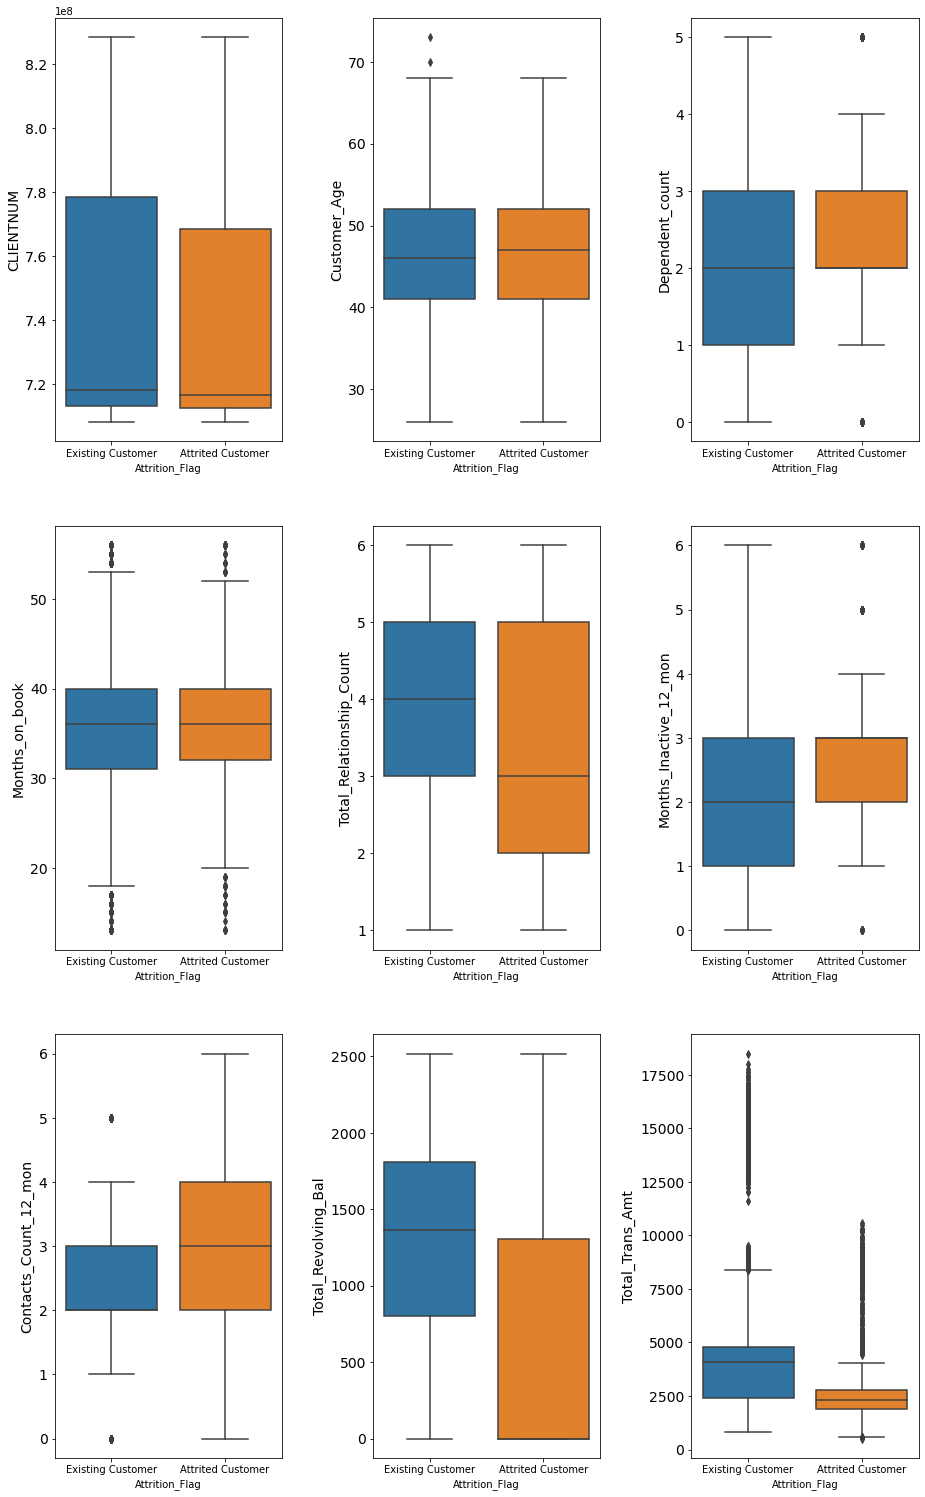

In [17]:
df_num = df.select_dtypes('int', 'float').columns
plt.figure(figsize = (15, 25))
for idx, col in enumerate(df_num):
    plt.subplot(3, 3, idx + 1)
    ax = sns.boxplot(data = df, y = df[col], x = df.Attrition_Flag)
    #plt.axhline(df[col].mean(), color='red', linewidth=3)
    #plt.axhline(df[col].median(), color='green', linewidth=3)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

**It can already be seen here that customers that attrited tend to have:**
- generally `low total revolving balance`, and
- `low total transaction count and amount` for the last 12 months. 

In [18]:
#Can remove outliers using the IQR method where any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier

def outlier_density(df,col_name):
    #print("Orig DF Size:"+ str(df.shape))
    Q1 = np.quantile(df[col_name],0.25)
    Q3 = np.quantile(df[col_name],0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    print("Lower Limit: %.2f" % lower_limit)
    print("Upper Limit: %.2f" % upper_limit)
    
    df_new = df[(df[col_name] > lower_limit) & (df[col_name] < upper_limit)]
    #print("New DF Size:"+ str(df_new.shape))
    print('Outlier count for ' + col + ': ' + str(df.shape[0] - df_new.shape[0]))
    print('Outlier density for ' + col + ': ' + str(round((1 - df_new.shape[0] / df.shape[0]) * 100, 4)) + '%')
    print('========')

In [19]:
for col in df_num:
    outlier_density(df,col)

Lower Limit: 622876626.75
Upper Limit: 863303676.75
Outlier count for CLIENTNUM: 0
Outlier density for CLIENTNUM: 0.0%
Lower Limit: 24.50
Upper Limit: 68.50
Outlier count for Customer_Age: 2
Outlier density for Customer_Age: 0.0197%
Lower Limit: -2.00
Upper Limit: 6.00
Outlier count for Dependent_count: 0
Outlier density for Dependent_count: 0.0%
Lower Limit: 17.50
Upper Limit: 53.50
Outlier count for Months_on_book: 386
Outlier density for Months_on_book: 3.8116%
Lower Limit: 0.00
Upper Limit: 8.00
Outlier count for Total_Relationship_Count: 0
Outlier density for Total_Relationship_Count: 0.0%
Lower Limit: 0.50
Upper Limit: 4.50
Outlier count for Months_Inactive_12_mon: 331
Outlier density for Months_Inactive_12_mon: 3.2685%
Lower Limit: 0.50
Upper Limit: 4.50
Outlier count for Contacts_Count_12_mon: 629
Outlier density for Contacts_Count_12_mon: 6.2111%
Lower Limit: -1778.50
Upper Limit: 3921.50
Outlier count for Total_Revolving_Bal: 0
Outlier density for Total_Revolving_Bal: 0.0%
Lo

# II. EXPLORATORY DATA ANALYSIS
**We can first undergo some feature engineering to create the following:**
   - `Avg_Trans_Amt`: The avg transaction amount over the last 12 months. This is obtained by dividing `Total_Trans_Amt` by `Total_Trans_Ct`.



In [20]:
df['Avg_Trans_Amt'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

**We then check for the following:**
   - Balance of our target variable `Attrition_Flag`.
       - Can be with respect to `Gender`, `Education_Level`, `Martial_Status`, `Income_Category`, `Card_Category`.
   - Pairplots that have hues for `Attrition_Flag`.
   - Histplots of numerical features using `Attrition_Flag` as the hue.
   - Bubble plots which use any of the categorical features as the hue with bubble sizes that can be coming from any of the numerical features (particularly curious about the bubble sizes for `Avg_Utilization_Ratio`, `Total_Trans_Amt`, `Credit_Limit`, and `Revolving_Balance`)
   
## Balance of our target: `Attrition_Flag`

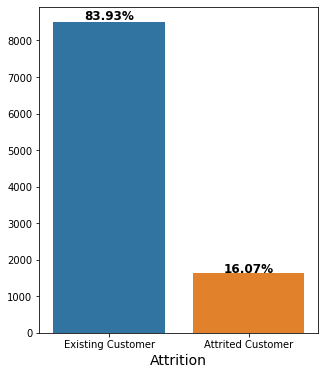

In [21]:
plt.figure(figsize=(5,6))
ax = sns.countplot(data = df, x = df.Attrition_Flag)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / df.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Attrition', fontsize = 14)
plt.ylabel(r'')
plt.show()

## Categorical feature analysis: Attrition status

**For this use-case, we specifically want to know the nature of people who got their credit card accounts attrite. So, we check on the distribution of attrited accounts over different categories to check which demographic have the highest number of existing and attrited accounts.**

AttributeError: ignored

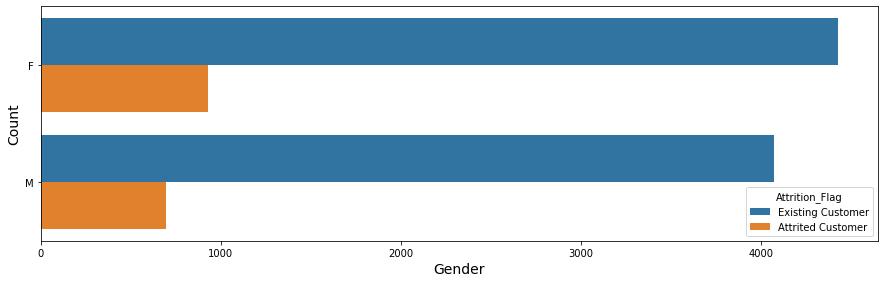

In [22]:
hues = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
plt.figure(figsize=(15,25))
for idx, col in enumerate(hues):
    plt.subplot(5,1,idx + 1)
    ax = sns.countplot(data = df , y = df[col], hue = df['Attrition_Flag'],
                       order = df[col].value_counts().index);
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    if idx == 1:
        plt.ylabel('')
    for col in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(col, weight = 'bold', fontsize = 12)
    plt.legend(loc = 'lower right')

**We can note the following:**
- There are `more accounts under females than males`, plus `more females that attrited`.
- The `highest amount of accounts came from college graduates`, plus this is the demographic that also incurred the `highest amount of attrited accounts`.
- The `highest amount of accounts came from married people`; however, the `highest number of attrited accounts came from both married and single people`. Additionally, only a `small portion of the divorced demographic attrited`.
- The `highest amount of accounts came from people with annual incomes less than $40K`, plus this is the demographic that also incurred the `highest amount of attrited accounts`.
- The `highest amount of accounts came from blue credit cards`, plus this is the demographic that also incurred the `highest amount of attrited accounts`.

## Numerical feature analysis: Histplots for `Attrition_Flag` hues

**Additionally, we can have a general overview of all the histplots so we can further describe the nature of people who got their accounts attrited.**

ValueError: ignored

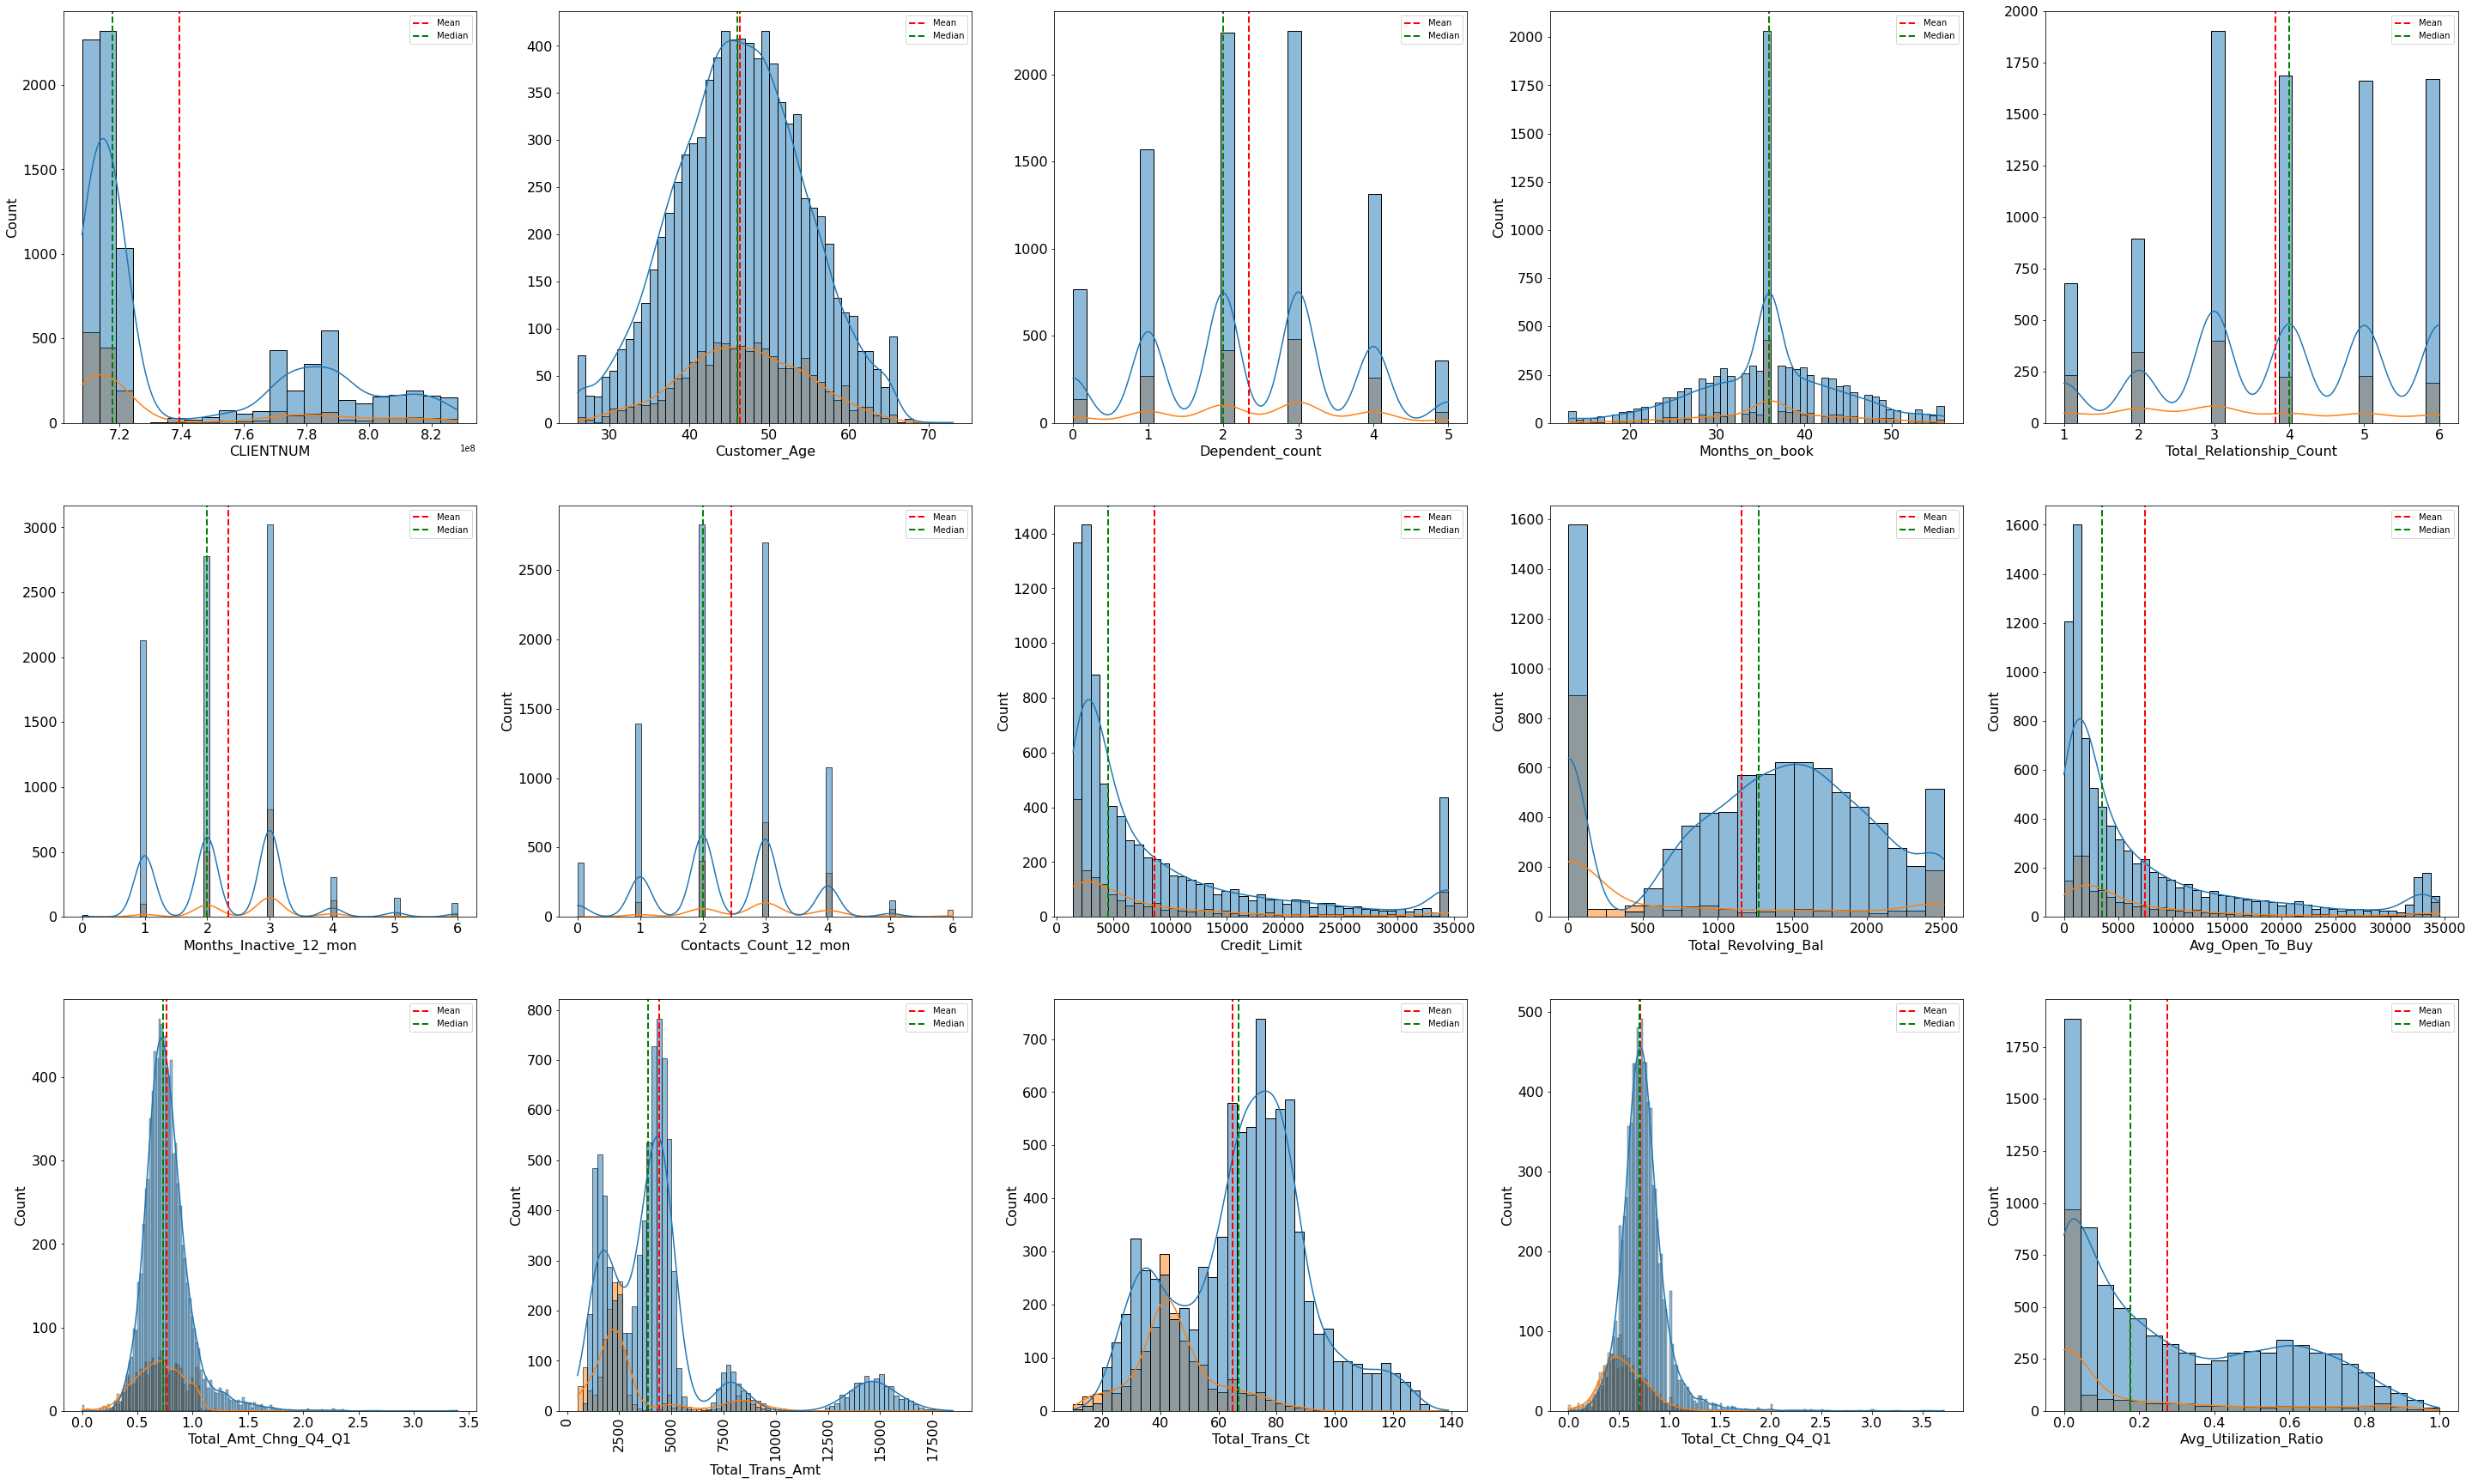

In [24]:
df_num = df.select_dtypes(['int', 'float'])
col_count = len(df_num.columns)
plt.figure(figsize=(50,30))
for idx, col in enumerate(df_num.columns):
    plt.subplot(3,5,idx + 1)
    ax = sns.histplot(data = df, x = col, kde = True, hue = df.Attrition_Flag);
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label = 'Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2, label = 'Median')
    plt.legend()
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.xlabel(col, fontsize = 16)
    plt.ylabel('Count',fontsize = 16)
    if idx in [1,2,4,5]:
        plt.ylabel('')
    if col == 'Total_Trans_Amt':
        plt.xticks(rotation = 90)

**These are some traits that were observed to increase the amount of atritted accounts:**

- Generally low average transaction amounts over the last 12 months
- Generally low average utilization ratio
- Generally low transaction amount and count change from the end of the year (Q4) compared to the start of the year (Q1)
- Generally low transaction count over the last 12 months
- Generally low transaction amount over the last 12 months
- Generally low average open to buy value over the last 12 months
- Generally low revolving balance
- Generally low credit limit
- Normally 3 months longest inactive for the last 12 months

**Note: these traits are also found within persons who have existing credit card accounts. However, these can be traits that can classify what makes a person attrite.**


# III. DATA PREMODELING



## Vectorization

In [25]:
# Encoding our target: Attrition_Flag
df = df.replace({'Attrition_Flag':{'Existing Customer':0, 'Attrited Customer':1}})

In [26]:
# Selecting all the categorical features to one hot encode
df_cat = df.select_dtypes('object')

# One hot encoding
df = pd.get_dummies(df, df_cat.columns, drop_first = True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,0,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,1,0,0,0,0,1,0,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,1,0,0,0,1,0,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,0,1,0,0,0,0,0,0


## Correlations

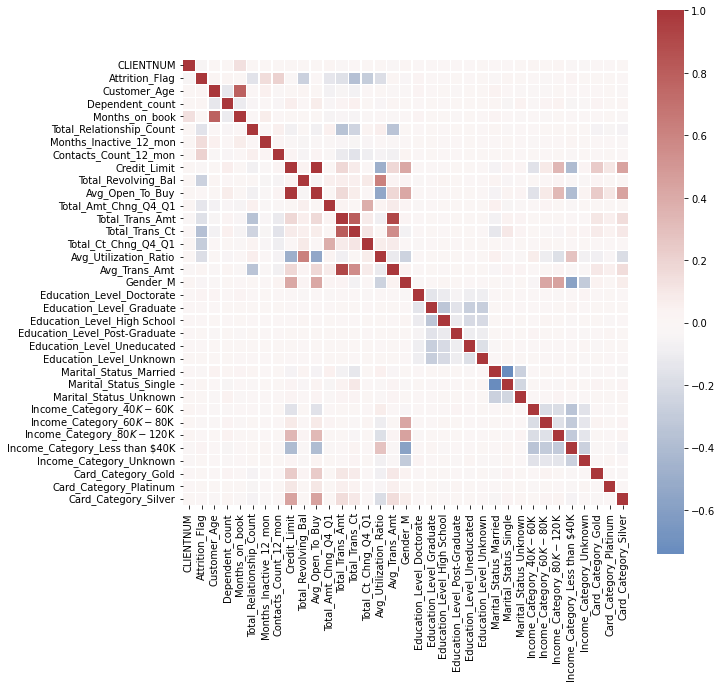

In [27]:
# Obtaining correlations
corrmat = df.corr()

#Plotting the correlations
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, cmap="vlag", center = 0,  vmax=1, square=True, linewidths=.5)

In [28]:
# We can also check for the correlations of feature pairs using the function below
def correlated_pairs(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    
    # Reshape the Matrix
    correlated = corr_matrix.unstack()

    # Reset index from multi-index to single index
    correlated = correlated.reset_index(level = 0).reset_index()

    # Rename Columns
    correlated.columns = ["Feature1", "Feature2", "Correlation"]

    # sort by correlation value
    corr_sorted = correlated.sort_values("Correlation", ascending = False)
    
    # remove self-correlated rows
    corr_sorted_pairs = corr_sorted[corr_sorted['Feature1'].values != corr_sorted['Feature2'].values]
    
    # reset index to easily filter out duplicate rows
    corr_sorted_pairs.reset_index(drop = True, inplace = True)
    
    # skip odd rows to remove redundant pairs
    corr_sorted_final = corr_sorted_pairs.iloc[::2]
    
    # select rows based on threshold
    corr_sorted_final_ver = corr_sorted_final[corr_sorted_final.Correlation > threshold]
    
    return corr_sorted_final_ver

In [29]:
# Obtaining highest correlated pairs
corr_sorted_final_ver = correlated_pairs(df, 0)
corr_sorted_final_ver.head()

,Feature1,Feature2,Correlation
0,Avg_Open_To_Buy,Credit_Limit,0.995981
2,Avg_Trans_Amt,Total_Trans_Amt,0.912118
4,Total_Trans_Amt,Total_Trans_Ct,0.807192
6,Customer_Age,Months_on_book,0.788912
8,Marital_Status_Single,Marital_Status_Married,0.741185


In [30]:
# Function that identifies all the features that have correlation values that meet or surpass the
# given threshold
def correlation_filter(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find index of feature columns with correlation greater than threshold
    correl = [column for column in upper.columns if any(upper[column] >= threshold)]
    
    return correl

In [31]:
to_drop = correlation_filter(df, 0.5)
to_drop

['Months_on_book',
 'Avg_Open_To_Buy',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio',
 'Avg_Trans_Amt',
 'Marital_Status_Single',
 'Income_Category_Less than $40K']

# IV. DATA MODELING

**After splitting the data, we will create various machine learning classifiers and identify the best model out of the bunch**

In [32]:
# Separating our features and target
features = df.drop('Attrition_Flag', axis = 1)
target = df['Attrition_Flag']

In [33]:
scaler = StandardScaler() # Scaler

logreg = LogisticRegression(random_state=1) # Logistic Regression
gnb = GaussianNB() # Gaussian Naive Bayes
rf = RandomForestClassifier(random_state=1) # Random Forest Classifier
gbm = GradientBoostingClassifier(random_state=123) # Gradient Boosting Model

# Pipelines
logreg_pipe = Pipeline([('scaler',scaler) , ('logreg', logreg)])
gnb_pipe = Pipeline([('scaler',scaler) , ('gnb', gnb)])
rf_pipe = Pipeline([('scaler',scaler) , ('rf', rf)])
gbm_pipe = Pipeline([('scaler',scaler) , ('gbm', gbm)])

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

## Training, testing, and comparison of performance metrics across the different models

In [34]:
classifiers = [logreg_pipe, gnb_pipe, rf_pipe, gbm_pipe]
classifier_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'Gradient Boosting']

# Arrays to store various metricsa
accs = [] # accuracy
accstd = [] # accuracy std
precs = [] # precision
precstd = [] # precision std
recs = [] # recall
recstd = [] # recall std
rocs = [] # roc_auc
rocstd = [] # roc_auc std

# Zip iterates through both lists simultaneously 
for clf, label in zip(classifiers, classifier_names):
    
    # Get the cross validated accuracy
    acc = cross_val_score(clf, features, target, cv = cv, scoring='accuracy')
    avg_acc = acc.mean() * 100
    std_acc = acc.std() * 100
    
    # Get the cross validated precision
    prec = cross_val_score(clf, features, target, cv = cv, scoring='precision')
    avg_prec = prec.mean() * 100
    std_prec = prec.std() * 100
    
    # Get the cross validated precision
    rec = cross_val_score(clf, features, target, cv = cv, scoring='recall')
    avg_rec = rec.mean() * 100
    std_rec = rec.std() * 100
    
    # Get the cross validated roc_auc
    roc = cross_val_score(clf, features, target, cv = cv, scoring='roc_auc')
    avg_roc = roc.mean() * 100
    std_roc = roc.std() * 100
    
    # Store scores in an array
    accs.append(float("{:.2f}".format(avg_acc)))
    accstd.append(float("{:.2f}".format(std_acc)))
    precs.append(float("{:.2f}".format(avg_prec)))
    precstd.append(float("{:.2f}".format(std_prec)))
    recs.append(float("{:.2f}".format(avg_rec)))
    recstd.append(float("{:.2f}".format(std_rec)))
    rocs.append(float("{:.2f}".format(avg_roc)))
    rocstd.append(float("{:.2f}".format(std_roc)))

In [35]:
# Creating DataFrame to summarize
data = {'Accuracy': accs,
        'Accuracy_std': accstd,
        'Precision': precs,
        'Precision_std': precstd,
        'Recall': recs,
        'Recall_std': recstd,
        'ROC-AUC': rocs,
        'ROC-AUC_std': rocstd}

df_metrics = pd.DataFrame(data, index = classifier_names)

In [36]:
df_metrics

,Accuracy,Accuracy_std,Precision,Precision_std,Recall,Recall_std,ROC-AUC,ROC-AUC_std
Logistic Regression,91.34,0.58,79.48,3.05,62.26,1.32,93.41,0.48
Gaussian Naive Bayes,88.35,0.22,65.02,0.93,59.50,1.01,86.69,1.17
Random Forest,96.22,0.26,93.81,1.10,81.87,1.09,98.93,0.10
Gradient Boosting,96.65,0.17,93.59,1.14,85.00,0.56,99.01,0.18


**We can see that the `Gradient Boosting Model` produced the best performance metrics, with really high values for precision, recall, and ROC-AUC!**

[Text(0, 0.5, 'Existing'), Text(0, 1.5, 'Attrited')]

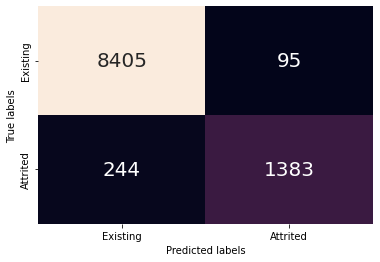

In [37]:
y_pred = cross_val_predict(gbm_pipe, features, target, cv=cv)
conf_mat = confusion_matrix(target, y_pred)

ax = sns.heatmap(conf_mat, cbar = False, fmt = 'g', annot = True, annot_kws={"size":20})

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Existing', 'Attrited'])
ax.yaxis.set_ticklabels(['Existing', 'Attrited'])

### ROC-AUC for the `Gradient Boosting Model`

**Another way of visualizing the performance of our model is through the use of ROC-AUCs. Referencing the **

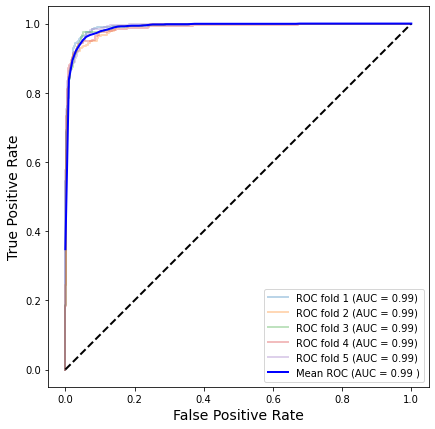

In [38]:
# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

# plot arrows
fig1 = plt.figure(figsize=[7,7])
ax1 = fig1.add_subplot(111,aspect = 'equal')

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(features, target):
    prediction = gbm_pipe.fit(features.iloc[train], target.iloc[train]).predict_proba(features.iloc[test])
    fpr, tpr, t = roc_curve(target.iloc[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.legend(loc="lower right")
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

### Feature importances


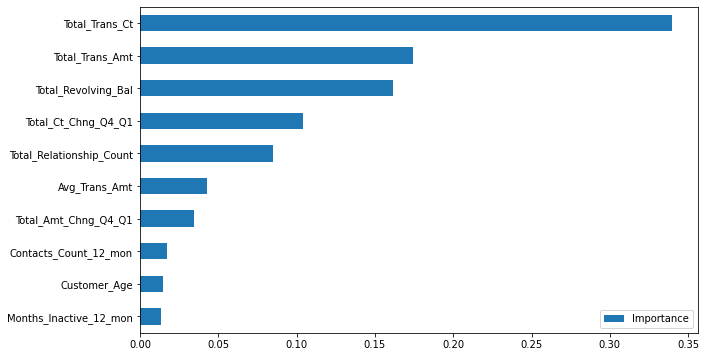

In [39]:
# Extracting the feature importance
f_importance = gbm_pipe.steps[1][1].feature_importances_

# Putting into a DataFrame along with corresponding features.
f_list = features.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

# Showing the 10 most important features
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"],ascending=True)[-10:]

#Visualize importance using a plot, values should be ascending for plotting purposes
df_feature_importance_asc.plot(kind='barh', figsize=(10,6))
plt.show()

**It can be seen that the most important set of features revolves on the numerical features rather than categorical ones. Additionally, they revolve on the transactions done by the customer.**

# Conclusions

**To summarize, we explored a dataset showing attrited and non-attrited clients. We also produced a model which tries to predict which client will undergo attrition or not based on their transaction and credit card data. The best model produced out of all the constructed models was a default 10-fold cross-validated Gradient Boosting Model with emphasis on its high precision and recall. These two metrics are important in this use-case because having high precision and recall indicates that the company will reduce additional costs spent in dealing with retaining actual non-attriters predicted to be attriters (precision) and also reducing the number of actual attriters that were predicted as non-attriters (recall).** 